In [1]:
import sklearn

In [2]:
from  sklearn import datasets
iris = datasets.load_iris

In [3]:
iris

<function sklearn.datasets._base.load_iris>

In [4]:
import pandas as pd

In [5]:
diabetes = pd.read_csv('https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv')
diabetes

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,testado_negativo
764,2,122,70,27,0,36.8,0.340,27,testado_negativo
765,5,121,72,23,112,26.2,0.245,30,testado_negativo
766,1,126,60,0,0,30.1,0.349,47,testado_positivo


In [6]:
batimentos = pd.read_csv('https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv')
batimentos

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063
...,...,...,...,...
995,86.385062,188.432199,37.108050,189.035111
996,63.631394,115.620461,18.905115,130.773648
997,71.200887,139.842839,24.960710,150.330074
998,62.487213,111.959082,17.989771,129.754953


In [62]:
colesterol = pd.read_csv('https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv')
colesterol

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236


In [23]:
### x dados de entrada 
### y o que ta produzindo 

x = diabetes['idade']
y = diabetes['resultado']

In [24]:
## retirando a última coluna do dataframe diabetes

x = diabetes.drop('resultado',axis=1)
y = diabetes['resultado']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
### default 25% treino e 25% teste

SEED = 4221988
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

In [27]:
### modelo de arvore de decisão

from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [28]:
clf_arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4221988, splitter='best')

In [29]:
clf_arvore.score(x_teste,y_teste)

0.6979166666666666

In [30]:
from sklearn.dummy import DummyClassifier

In [31]:
clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(x_treino,y_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [32]:
clf_dummy.score(x_teste,y_teste)

0.609375

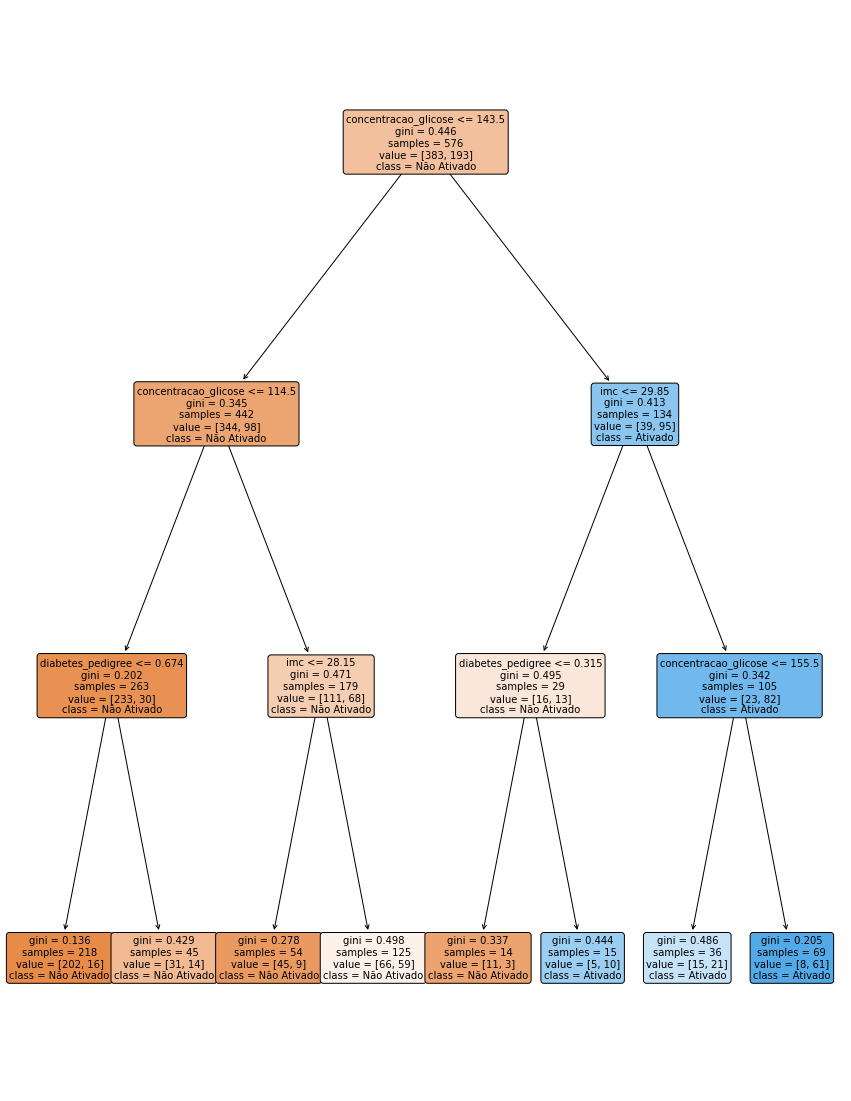

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,20))
tree.plot_tree(clf_arvore, 
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado','Ativado'], rotate=True)

plt.show()

In [34]:
### Regressão estima um valor
import seaborn as sns

<Figure size 7200x3600 with 0 Axes>

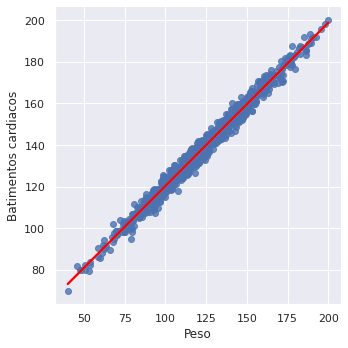

In [35]:
sns.set()
plt.figure(figsize=(100,50))

sns.lmplot(x='Peso',y='Batimentos cardiacos',data=batimentos,line_kws={'color':'red'})
plt.show()

In [36]:
x= batimentos[['Peso','Idade']]
y= batimentos[['Batimentos cardiacos']]

In [37]:
from sklearn.model_selection import train_test_split

SEED=4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

In [38]:
from sklearn import linear_model


In [39]:
rgs = linear_model.LinearRegression(fit_intercept=False,normalize=True)

In [40]:
rgs.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [41]:
rgs.score(x_teste, y_teste)

0.9872272899997122

In [43]:
#### clustering - separar por grupos

## aprendizado não supervisionado

### colesterol
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


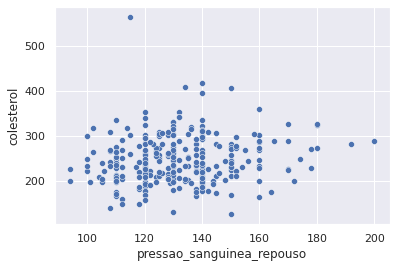

In [44]:
sns.scatterplot(x='pressao_sanguinea_repouso',y='colesterol',data=colesterol)

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state=9)

In [64]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [65]:
x = colesterol.select_dtypes('int64')

In [66]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [68]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

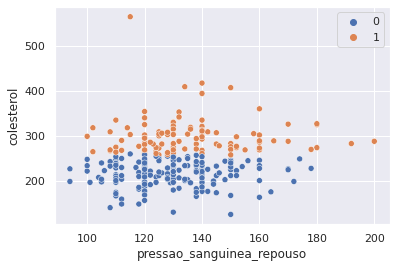

In [69]:
sns.scatterplot(x='pressao_sanguinea_repouso',y='colesterol',data=colesterol,hue=kmeans.labels_)

In [70]:
colesterol['clusters'] = kmeans.labels_

In [71]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    216.473958
1    298.963964
Name: colesterol, dtype: float64